In [1]:
import numpy as np
import pandas as pd
coins = pd.read_csv('DMCoins.csv')

In [2]:
coinsLargeCent = coins[coins['Denom'] == 'LargeCent']
coinsLargeCent = coinsLargeCent[['Year', 'Mint_State', 'Value']]

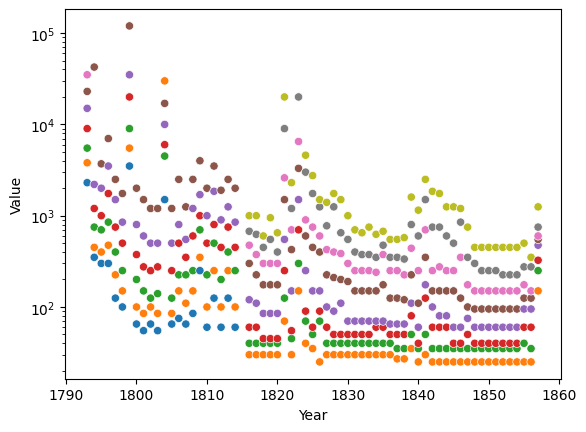

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x = 'Year', y = 'Value', data=coinsLargeCent, hue='Mint_State', legend=False)
plt.yscale('log')

In [4]:
import pandas as pd

df = pd.DataFrame(coinsLargeCent)

# Calculate IQR for the 'Value' column
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

# Define a lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on IQR
outliers = (df['Value'] < lower_bound) | (df['Value'] > upper_bound)

# Print the rows containing outliers
print("Rows with outliers based on IQR:")
print(df[outliers])

Rows with outliers based on IQR:
     Year   Mint_State    Value
254  1793        AGood   2300.0
255  1793         Good   3800.0
256  1793        VGood   5500.0
257  1793         Fine   9000.0
258  1793        VFine  15000.0
..    ...          ...      ...
577  1839  MintState63   1600.0
592  1841  MintState60   1500.0
593  1841  MintState63   2500.0
601  1842  MintState63   1850.0
609  1843  MintState63   1750.0

[62 rows x 3 columns]


In [5]:
indicies = df[outliers].index
indicies = np.array(indicies)
indicies

array([254, 255, 256, 257, 258, 259, 260, 265, 266, 271, 272, 276, 277,
       278, 283, 284, 290, 291, 292, 293, 294, 295, 296, 302, 308, 321,
       322, 323, 324, 325, 326, 338, 350, 355, 356, 362, 367, 368, 374,
       380, 386, 431, 432, 433, 434, 442, 446, 447, 448, 449, 456, 457,
       464, 465, 473, 489, 497, 577, 592, 593, 601, 609])

In [6]:
for i in indicies:
  coinsLargeCent = coinsLargeCent.drop(i)

In [7]:
coinsLargeCent

,Year,Mint_State,Value
261,1794,AGood,350.0
262,1794,Good,450.0
263,1794,VGood,750.0
264,1794,Fine,1200.0
267,1795,AGood,300.0
...,...,...,...
717,1857,VFine,475.0
718,1857,EFine,550.0
719,1857,AUncirculated,600.0
720,1857,MintState60,750.0


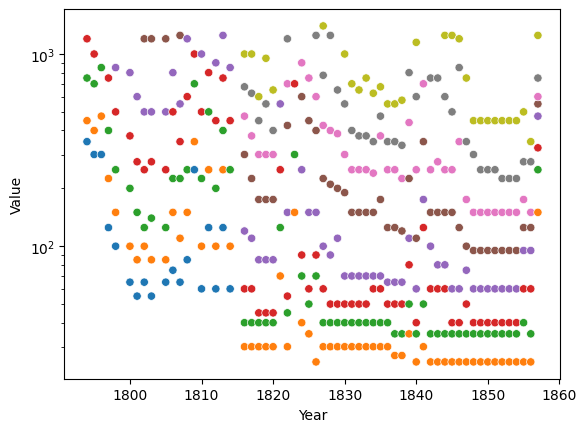

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x = 'Year', y = 'Value', data=coinsLargeCent, hue='Mint_State', legend=False)
plt.yscale('log')

In [9]:
from sklearn.preprocessing import LabelEncoder
lencMS = LabelEncoder()
coinsLargeCent["Mint_State"] = lencMS.fit_transform(coinsLargeCent["Mint_State"])
coinsLargeCent["Mint_State"]

261    0
262    4
263    8
264    3
267    0
      ..
717    7
718    2
719    1
720    5
721    6
Name: Mint_State, Length: 406, dtype: int64

In [10]:
coinsLargeCent['log_Value'] = np.log(coinsLargeCent['Value'])

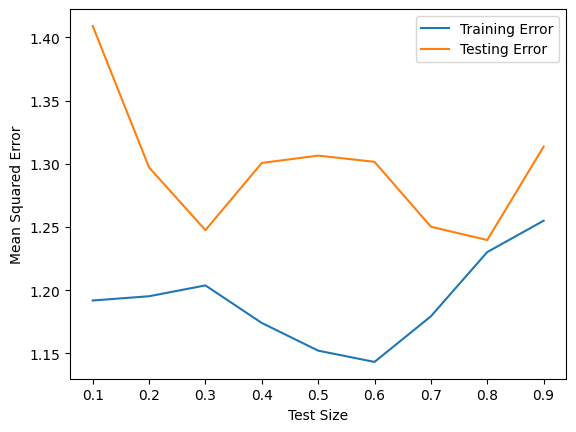

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = coinsLargeCent.iloc[:,0:2]
y = coinsLargeCent.log_Value

# Create a linear regression model
model = LinearRegression()

# Choose a range of test sizes
test_sizes = np.linspace(0.1, 0.9, 9)

# Lists to store training and testing errors for each test size
train_errors = []
test_errors = []

for test_size in test_sizes:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plotting the errors
plt.plot(test_sizes, train_errors, label='Training Error')
plt.plot(test_sizes, test_errors, label='Testing Error')
plt.xlabel('Test Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
X = coinsLargeCent.iloc[:,0:2]
Y = coinsLargeCent.log_Value

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3, random_state=0)

In [13]:
X

,Year,Mint_State
261,1794,0
262,1794,4
263,1794,8
264,1794,3
267,1795,0
...,...,...
717,1857,7
718,1857,2
719,1857,1
720,1857,5


In [14]:
# Use the Linear Regression Model
from sklearn.linear_model import LinearRegression

# Define a linear regression model
reg = LinearRegression()

# Train and fit the training data
reg.fit(x_train , y_train)

# We will measure how well our linear regression works in our x_test split
# predictions are the estimations
log_predictions = reg.predict(x_test)
predictions = np.exp(log_predictions)

In [15]:
from sklearn.metrics import mean_squared_error

# To compare models
mseModel1 = mean_squared_error(y_test, predictions)

In [16]:
mseModel1

26990.67372958604

In [17]:
coefficients = reg.coef_
intercept = reg.intercept_

print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')

Coefficients: [-0.01751358 -0.03717528]
Intercept: 37.195878401506334


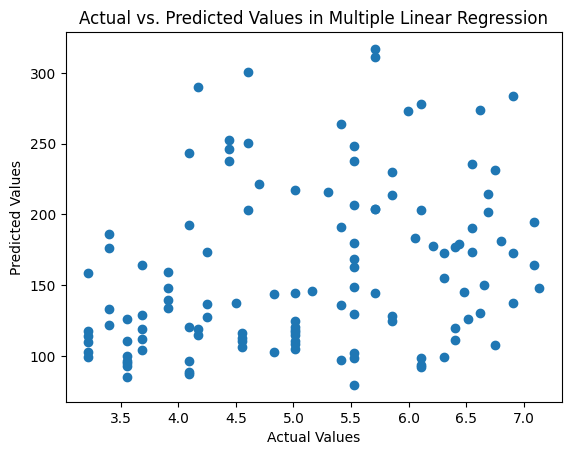

In [18]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values in Multiple Linear Regression')
plt.show()

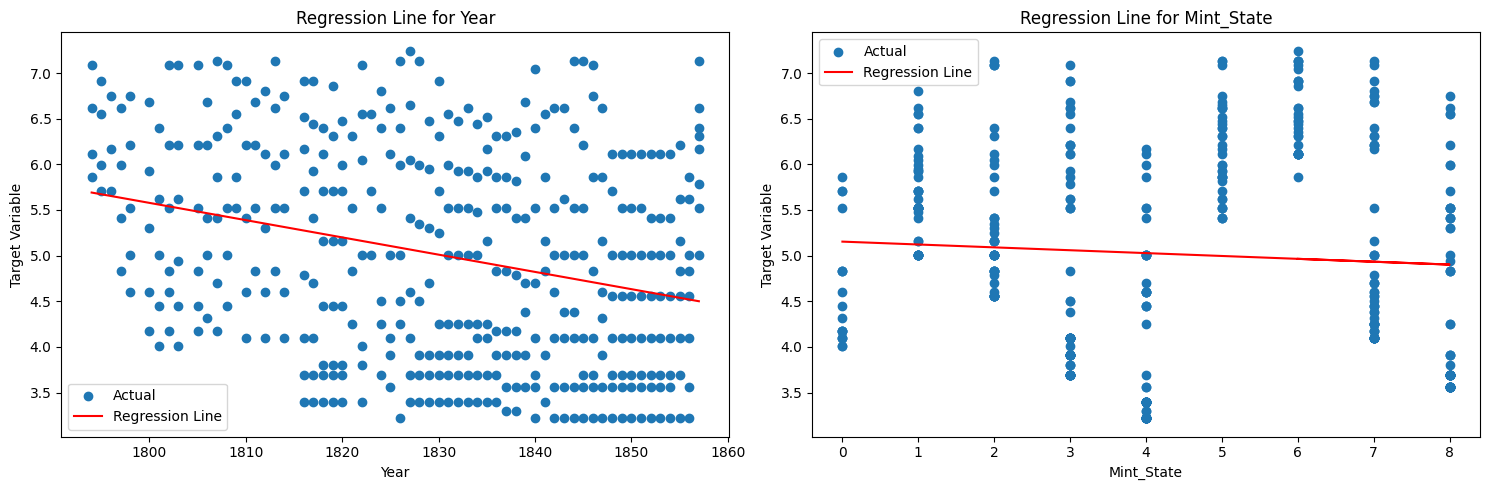

In [19]:
# Create subplots for each independent variable
fig, axs = plt.subplots(nrows=1, ncols=len(X.columns), figsize=(15, 5))

# Iterate through each independent variable
for i, col in enumerate(X.columns):
    # Extract the independent variable
    x_values = X[col].values.reshape(-1, 1)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(x_values, Y)

    # Predict the target variable based on the independent variable
    y_pred = model.predict(x_values)

    # Plot the regression line
    axs[i].scatter(x_values, Y, label='Actual')
    axs[i].plot(x_values, y_pred, color='red', label='Regression Line')
    axs[i].set_title(f'Regression Line for {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Target Variable')
    axs[i].legend()

plt.tight_layout()
plt.show()

In [20]:
coinsLargeCent[coinsLargeCent['Mint_State'] == 7]

,Year,Mint_State,Value,log_Value
289,1798,7,850.0,6.745236
301,1800,7,800.0,6.684612
307,1801,7,600.0,6.396930
313,1802,7,500.0,6.214608
319,1803,7,500.0,6.214608
331,1805,7,500.0,6.214608
337,1806,7,800.0,6.684612
343,1807,7,550.0,6.309918
349,1808,7,1200.0,7.090077
361,1810,7,1000.0,6.907755


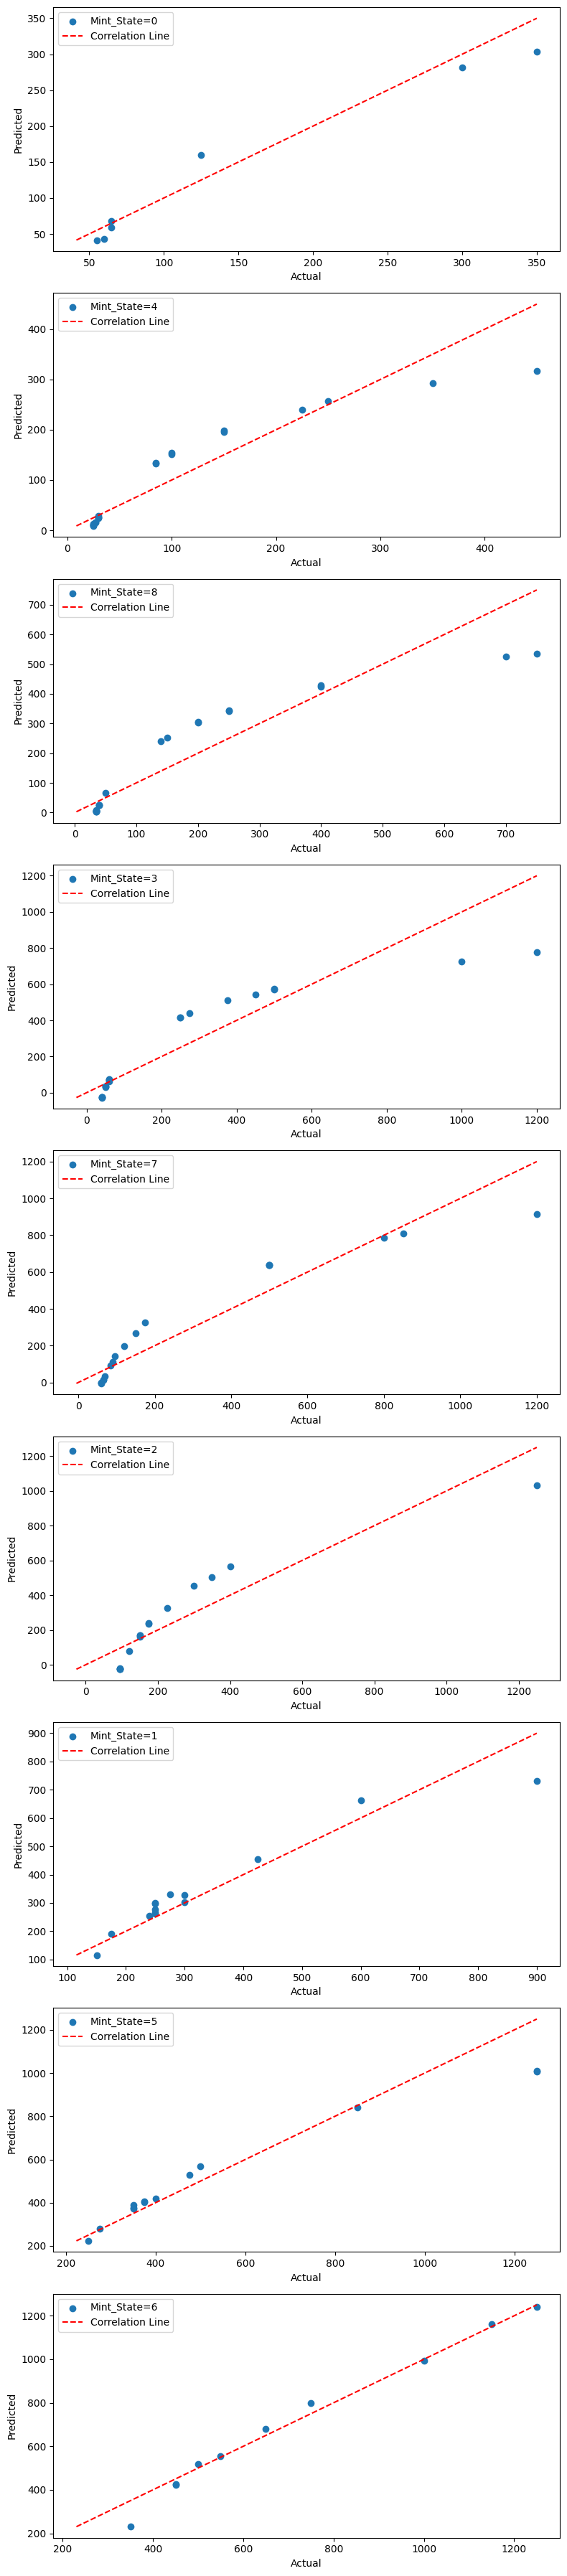

In [21]:
# @title Default title text
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
attributes = coinsLargeCent.drop(['Value'], axis=1)  # All columns except the target variable
target_variable = coinsLargeCent['Value']  # Specify the column name of your target variable
categorical_attribute = 'Mint_State'  # Specify the column name of your categorical attribute

# Get unique values of the categorical attribute
unique_values = coinsLargeCent[categorical_attribute].unique()

# Set up subplots
num_rows = len(unique_values)
fig, axes = plt.subplots(num_rows, 1, figsize=(8, 4 * num_rows))

# Iterate through each unique value of the categorical attribute
for i, value in enumerate(unique_values):
    # Create a subset of the data for the current category
    subset_data = coinsLargeCent[coinsLargeCent[categorical_attribute] == value]

    # Extract attributes and target variable for the subset
    subset_attributes = subset_data.drop(['Value'], axis=1)
    subset_target = subset_data['Value']

    if len(subset_data) > 1:
      # Split the subset into training and testing sets
      subset_attributes_train, subset_attributes_test, subset_target_train, subset_target_test = train_test_split(
          subset_attributes, subset_target, test_size=0.33, random_state=42
      )

      # Create a linear regression model
      model = LinearRegression()

      # Train the model on the training data subset
      model.fit(subset_attributes_train, subset_target_train)

      # Make predictions on the test data subset
      predictions = model.predict(subset_attributes_test)

      # Plot actual vs. predicted for the current category
      axes[i].scatter(subset_target_test, predictions, label=f'{categorical_attribute}={value}')
      axes[i].set_xlabel('Actual')
      axes[i].set_ylabel('Predicted')
      axes[i].legend()

      # Plot the correlation line
      min_val = min(subset_target_test.min(), predictions.min())
      max_val = max(subset_target_test.max(), predictions.max())
      correlation_line = [min_val, max_val]
      axes[i].plot(correlation_line, correlation_line, linestyle='--', color='red', label='Correlation Line')
      axes[i].legend()
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

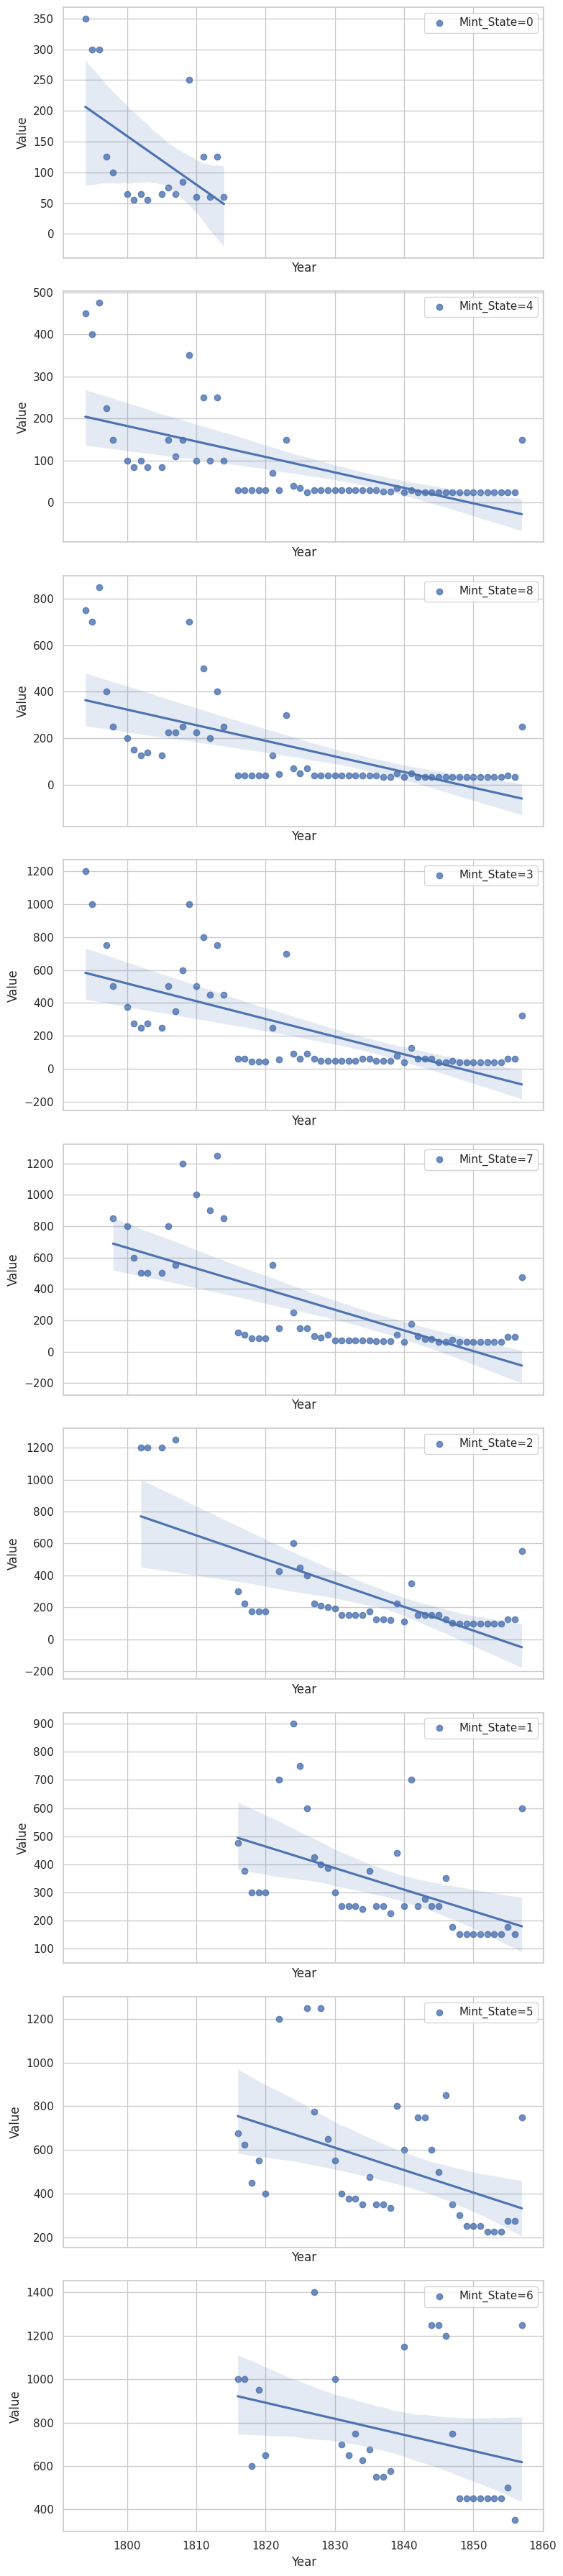

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
categorical_attribute = 'Mint_State'  # Specify the column name of your categorical attribute
target_variable = 'Value'  # Specify the column name of your target variable

# Set the style of seaborn
sns.set(style="whitegrid")

# Get unique values of the categorical attribute
unique_values = coinsLargeCent[categorical_attribute].unique()

# Set up subplots
num_rows = len(unique_values)
fig, axes = plt.subplots(num_rows, 1, figsize=(8, 4 * num_rows), sharex=True)

# Iterate through each unique value of the categorical attribute
for i, value in enumerate(unique_values):
    # Create a subset of the data for the current category
    subset_data = coinsLargeCent[coinsLargeCent[categorical_attribute] == value]

    # Plot a scatter plot with a regression line
    sns.regplot(x=subset_data['Year'], y=subset_data[target_variable], ax=axes[i], label=f'{categorical_attribute}={value}')

    # Set plot labels and title
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(target_variable)
    axes[i].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


                Year  Mint_State     Value  log_Value
Year        1.000000         NaN -0.523689  -0.472757
Mint_State       NaN         NaN       NaN        NaN
Value      -0.523689         NaN  1.000000   0.978290
log_Value  -0.472757         NaN  0.978290   1.000000
                Year  Mint_State     Value  log_Value
Year        1.000000         NaN -0.639217  -0.761739
Mint_State       NaN         NaN       NaN        NaN
Value      -0.639217         NaN  1.000000   0.921942
log_Value  -0.761739         NaN  0.921942   1.000000
                Year  Mint_State     Value  log_Value
Year        1.000000         NaN -0.639063  -0.756636
Mint_State       NaN         NaN       NaN        NaN
Value      -0.639063         NaN  1.000000   0.914557
log_Value  -0.756636         NaN  0.914557   1.000000
                Year  Mint_State     Value  log_Value
Year        1.000000         NaN -0.678278  -0.751291
Mint_State       NaN         NaN       NaN        NaN
Value      -0.678278        

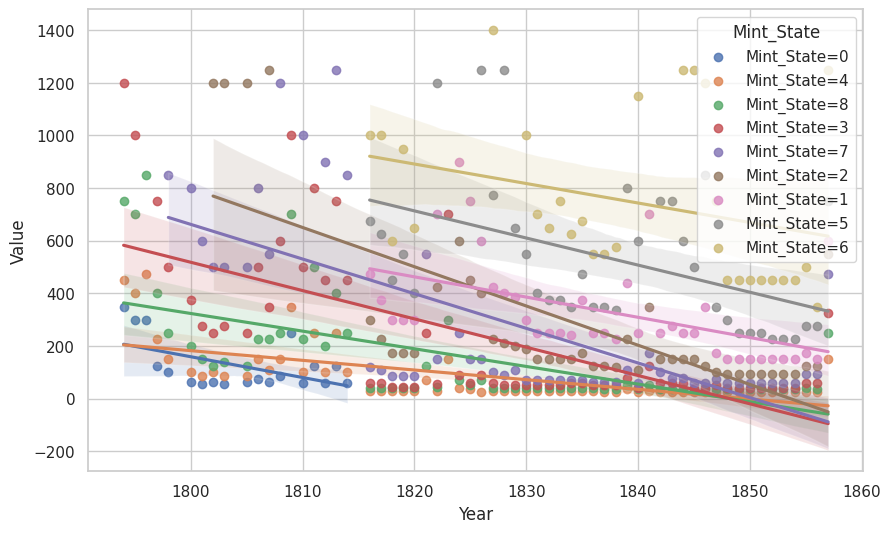

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
categorical_attribute = 'Mint_State'  # Specify the column name of your categorical attribute
target_variable = 'Value'  # Specify the column name of your target variable

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with regression lines for each category
plt.figure(figsize=(10, 6))

# Iterate through each unique value of the categorical attribute
for value in coinsLargeCent[categorical_attribute].unique():
    # Create a subset of the data for the current category
    subset_data = coinsLargeCent[coinsLargeCent[categorical_attribute] == value]

    # Plot a scatter plot with a regression line for each category
    sns.regplot(x=subset_data['Year'], y=subset_data[target_variable], label=f'{categorical_attribute}={value}')

    print(subset_data.corr())

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel(target_variable)
plt.legend(title=categorical_attribute)

# Show the plot
plt.show()

In [24]:
overall_correlation_matrix = coinsLargeCent.corr()
overall_correlation_matrix

,Year,Mint_State,Value,log_Value
Year,1.000000,0.046285,-0.248281,-0.287927
Mint_State,0.046285,1.000000,0.039809,-0.067224
Value,-0.248281,0.039809,1.000000,0.888125
log_Value,-0.287927,-0.067224,0.888125,1.000000


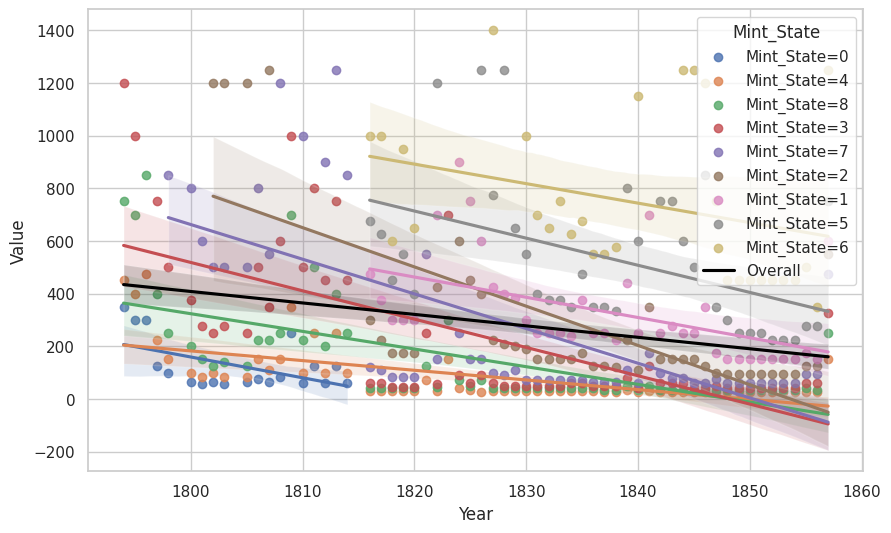

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
categorical_attribute = 'Mint_State'  # Specify the column name of your categorical attribute
target_variable = 'Value'  # Specify the column name of your target variable
attribute_column = 'Year'  # Specify the column name of the attribute of interest

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with regression lines for each category
plt.figure(figsize=(10, 6))

# Iterate through each unique value of the categorical attribute
for value in coinsLargeCent[categorical_attribute].unique():
    # Create a subset of the data for the current category
    subset_data = coinsLargeCent[coinsLargeCent[categorical_attribute] == value]

    # Plot a scatter plot with a regression line for each category
    sns.regplot(x=subset_data[attribute_column], y=subset_data[target_variable], label=f'{categorical_attribute}={value}')

# Plot overall regression line
sns.regplot(x=coinsLargeCent[attribute_column], y=coinsLargeCent[target_variable], scatter=False, color='black', label='Overall')

# Set plot labels and title
plt.xlabel(attribute_column)
plt.ylabel(target_variable)
plt.legend(title=categorical_attribute)

# Show the plot
plt.show()

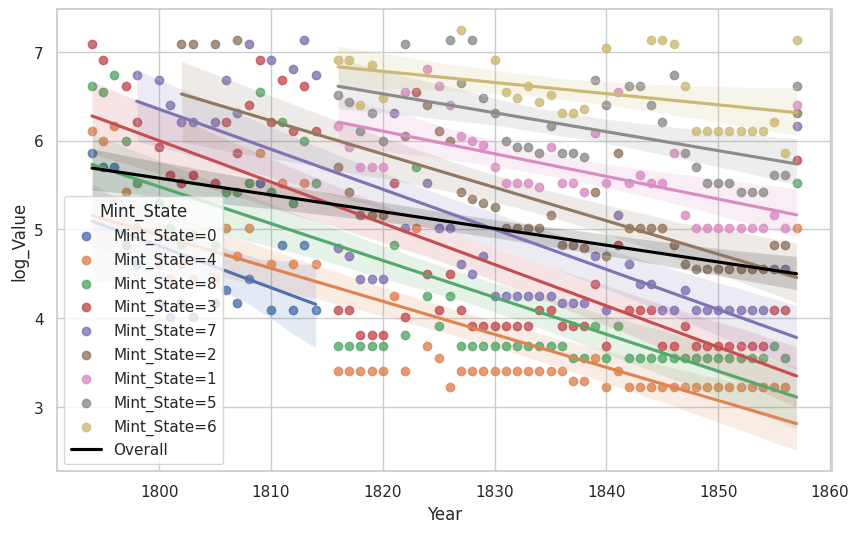

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
categorical_attribute = 'Mint_State'  # Specify the column name of your categorical attribute
target_variable = 'log_Value'  # Specify the column name of your target variable
attribute_column = 'Year'  # Specify the column name of the attribute of interest

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with regression lines for each category
plt.figure(figsize=(10, 6))

# Iterate through each unique value of the categorical attribute
for value in coinsLargeCent[categorical_attribute].unique():
    # Create a subset of the data for the current category
    subset_data = coinsLargeCent[coinsLargeCent[categorical_attribute] == value]

    # Plot a scatter plot with a regression line for each category
    sns.regplot(x=subset_data[attribute_column], y=subset_data[target_variable], label=f'{categorical_attribute}={value}')

# Plot overall regression line
sns.regplot(x=coinsLargeCent[attribute_column], y=coinsLargeCent[target_variable], scatter=False, color='black', label='Overall')

# Set plot labels and title
plt.xlabel(attribute_column)
plt.ylabel(target_variable)
plt.legend(title=categorical_attribute)

# Show the plot
plt.show()